In [1]:
import h5py
import numpy as np
import seaborn as sns
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

In [3]:
def Read_Results(method, case):
    with h5py.File(f"./Results/PLS2_PM25_{method}.h5", "r") as f:
        dat={'timer': f['timer'][:],
             'coef':  f['coef'][:]}
    return dat

In [8]:
NIPALS = Read_Results('NIPALS', 0)
OLPLS  = Read_Results('OLPLS', 1)

print("NIPALS v.s. OLPLS")
print("coef Error:  {:15.7e}".format(RMSE(NIPALS['coef'], OLPLS['coef'])) )

NIPALS v.s. OLPLS
coef Error:    4.5609741e-03


In [4]:
SIMPLS  = Read_Results('SIMPLS', 0)
ISIMPLS = Read_Results('ISIMPLS', 1)

print("SIMPLS v.s. ISIMPLS")
print("coef Error:  {:15.7e}".format(RMSE(SIMPLS['coef'], ISIMPLS['coef'])))

SIMPLS v.s. ISIMPLS
coef Error:    1.4399911e-16


In [5]:
SVDPLS  = Read_Results('SVDPLS', 0)
ISVDPLS = Read_Results('ISVDPLS', 1)

print("SVDPLS v.s. ISVDPLS ")
print("coef Error:  {:15.7e}".format(RMSE(SVDPLS['coef'], ISVDPLS['coef'])))

SVDPLS v.s. ISVDPLS 
coef Error:    4.7883561e-04


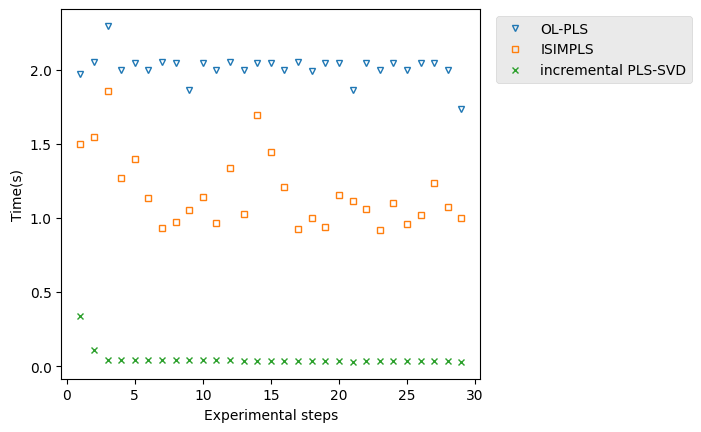

In [6]:
N_steps= len(ISIMPLS['timer'][0])
fig, ax = plt.subplots()
plt.subplots_adjust(right=.65)
plt.style.use('ggplot')
ms = 4

plt.subplots_adjust(right=.78)

plt.plot(range(1,N_steps+1), OLPLS['timer'][1],
                label='OL-PLS', ls='', marker='v', markersize=ms, fillstyle='none')
plt.plot(range(1,N_steps+1), ISIMPLS['timer'][1],
                label='ISIMPLS', ls='', marker='s', markersize=ms, fillstyle='none')
plt.plot(range(1,N_steps+1), ISVDPLS['timer'][1],
                label='incremental PLS-SVD', ls='', marker='x', markersize=ms, fillstyle='none')


ax.set_xlabel("Experimental steps")
ax.set_ylabel("Time(s)")
ax.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.savefig('./fig/TW_PM25_inc.pdf')
plt.close()

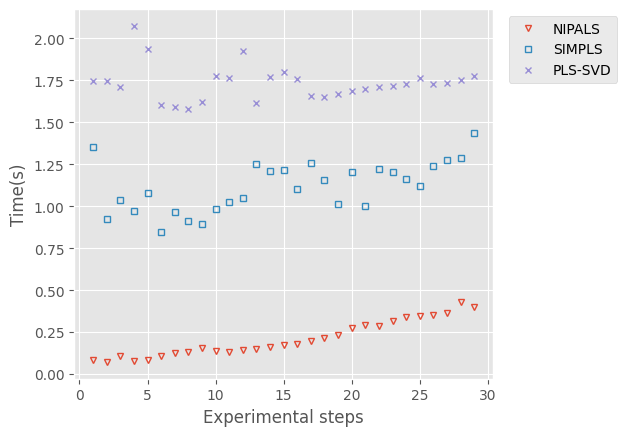

In [9]:
N_steps= len(ISIMPLS['timer'][0])
fig, ax = plt.subplots()
plt.subplots_adjust(right=.65)
plt.style.use('ggplot')
ms = 4

plt.subplots_adjust(right=.78)

plt.plot(range(1,N_steps+1), NIPALS['timer'][1],
         label='NIPALS', ls='', marker='v', markersize=ms, fillstyle='none')
plt.plot(range(1,N_steps+1), SIMPLS['timer'][1],
         label='SIMPLS', ls='', marker='s', markersize=ms, fillstyle='none')
plt.plot(range(1,N_steps+1), SVDPLS['timer'][1],
         label='PLS-SVD', ls='', marker='x', markersize=ms, fillstyle='none')


ax.set_xlabel("Experimental steps")
ax.set_ylabel("Time(s)")
ax.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.savefig('./fig/TW_PM25_full.pdf')
# plt.close()